# Lesson 6 Decision Trees

A supervised learning approach for both Classification and Regression problems.

Define:

    Classification:
    
    Regression:

Quiz 1: on whiteboard in class

What a decision Tree looks like:

<img src='dt.png'>

Lets play the 20 questions game. Assemble in pairs of two. One person picks a reasonobly well known person, place or thing and the other person has 20 questions to try and guess that noun. 

Lets discuss Strategy:

Quiz: What is the 'best'?

Enter entropy stage right:

    Entorpy a measure of randomness (H is entropy)
    
<img src='entropy.jpg'>
    
    

Information gain (E is entropy):

<img src='infogain.png'>



Information theory!

It takes ~33 bits of information to identify an individual

S = log2 (1/6625000000) = 32.6 bits of information.

Knowing my ZIP code is 40203: ΔS = - log2 (452/6,625,000,000) = 23.81 bits
Birthday: ΔS = - log2 Pr(DOB=2nd of January) = -log2 (1/365) = 8.51 bits of information

8.51 + 23.81 = 32.32

What types of variables does this hadle well? Discrete or continuous?

Quiz: Does it make sense to repeat an attribute allong a path in a tree?

Other considerations:

    When do we stop splitting?
   
    

Entropy is a good splitting criteria for classification problems but a different splitting criteria is needed for regression problems. 

# In class Lab 1

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#TODO
# Load the dataset
full_data = pd.read_csv('titanic_data.csv')

# Print the first few entries of the RMS Titanic data
display(full_data.head(10))

ImportError: bad magic number in 'visuals': b'\x03\xf3\r\n'

In [7]:
#TODO
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)

# Show the new dataset with 'Survived' removed
display(data.head(10))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


In [9]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

Question 1
Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?


In [10]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


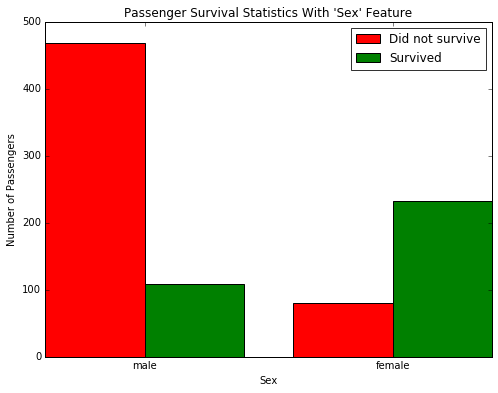

In [11]:
vs.survival_stats(data, outcomes, 'Sex')

In [12]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        #TODO
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2
*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*  

In [13]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


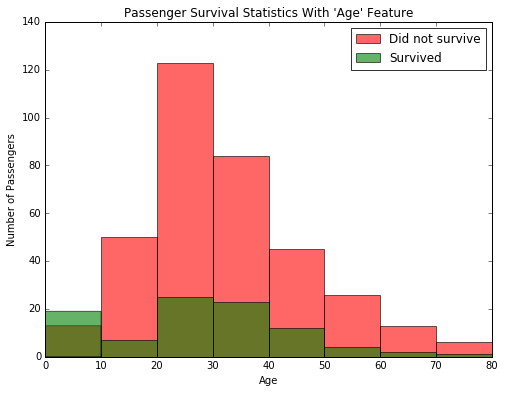

In [14]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [15]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        #TODO
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

### Question 3
*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?* 

In [16]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


Use the below visual code to explore other features that might give a boost to your predictions

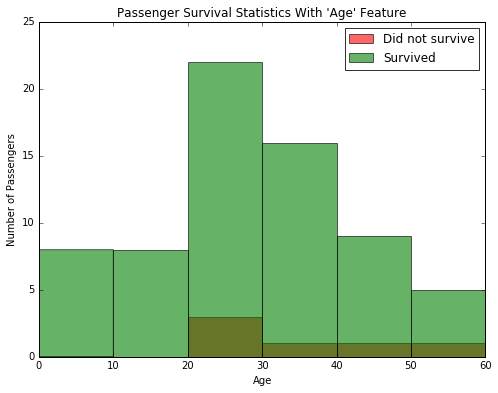

In [17]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 2"])

In [18]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        #TODO
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            if passenger['Age'] < 10 and passenger['Pclass'] == 1:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if (passenger['Age'] < 40) and (passenger['Pclass'] == 1):
                predictions.append(1)
            elif (passenger['Pclass'] == 2 and passenger['Age'] <10):
                predictions.append(1)
            else:
                predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4
*Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?*  

In [19]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.02%.


In [20]:
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
outcomes = full_data['Survived'] # we need to get rid of all variables that doesn't make sense in term of decision based on
data = full_data.drop(['Survived','Name','Cabin','PassengerId'], axis=1)
display(data.head())
display(outcomes.head())
#data.dtypes() # to see the type of values

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [22]:
def preprocess_features(X): # X any dataset
    output = pd.DataFrame(index=X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data=pd.get_dummies(col_data, prefix=col)
        if col=='Age':
            col_data=col_data.replace('NaN', 0)
        output = output.join(col_data)
    return output
data = preprocess_features(data)

#print "Precessed feature columns ({} features):\n{}".format(len(data.columns), list(data.columns))

display(data.head())

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,...,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,22.0,1,0,0,0,0,0,...,0,0,0,0,0,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,0,0,0,0,...,0,0,0,0,0,0,71.2833,1,0,0
2,3,1,0,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,0,0,0,0,...,0,0,0,0,0,0,53.1000,0,0,1
4,3,0,1,35.0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.0500,0,0,1


# Conclusion

After several iterations of exploring and conditioning on the data, you have built a useful algorithm for predicting the survival of each passenger aboard the RMS Titanic. The technique applied in this project is a manual implementation of a simple machine learning model, the *decision tree*. A decision tree splits a set of data into smaller and smaller groups (called *nodes*), by one feature at a time. Each time a subset of the data is split, our predictions become more accurate if each of the resulting subgroups are more homogeneous (contain similar labels) than before. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

A decision tree is just one of many models that come from *supervised learning*. In supervised learning, we attempt to use features of the data to predict or model things with objective outcome labels. That is to say, each of our data points has a known outcome value, such as a categorical, discrete label like `'Survived'`, or a numerical, continuous value like predicting the price of a house.

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(data, outcomes)

In [24]:
clf.score(data, outcomes)

0.99887766554433222

In [25]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

In [26]:
#pydot
#pip install git+https://github.com/nlhepler/pydot.git

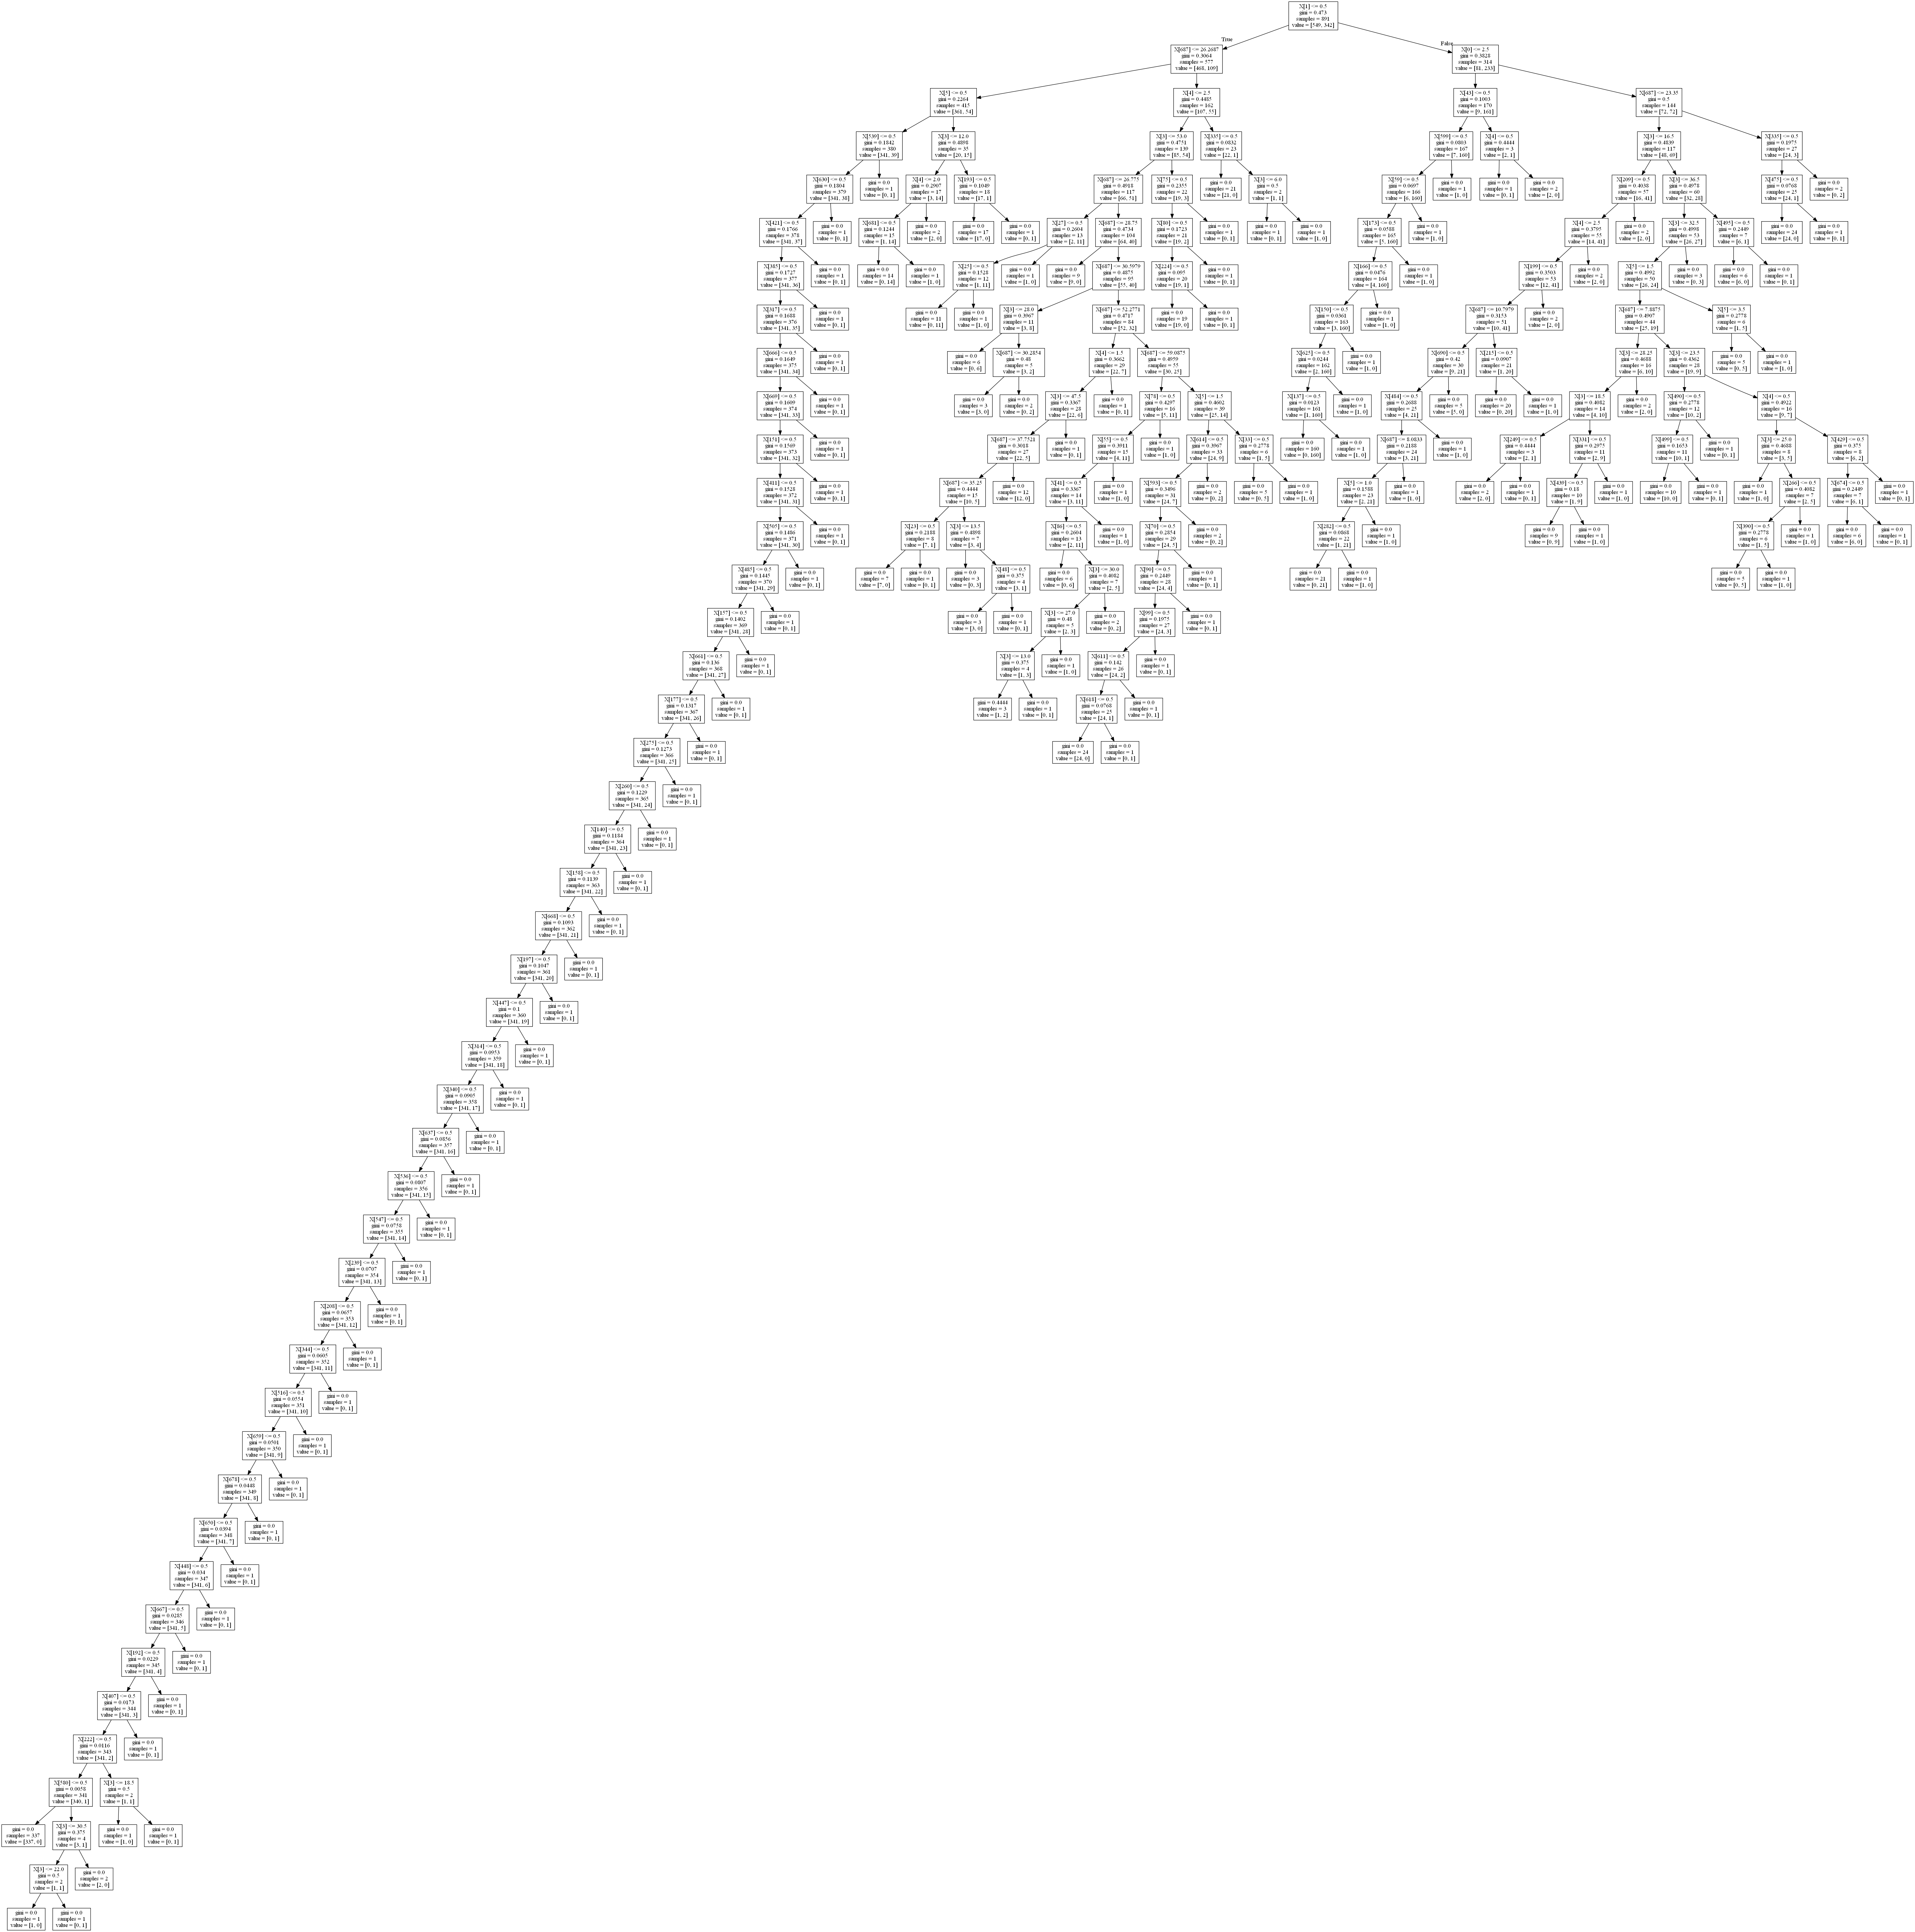

In [30]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("test.pdf")
Image(graph.create_png())

# Decision Tree Regression example Lab #2

In [56]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals2.py
import visuals2 as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [59]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

In [60]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [61]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

In [62]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)


# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

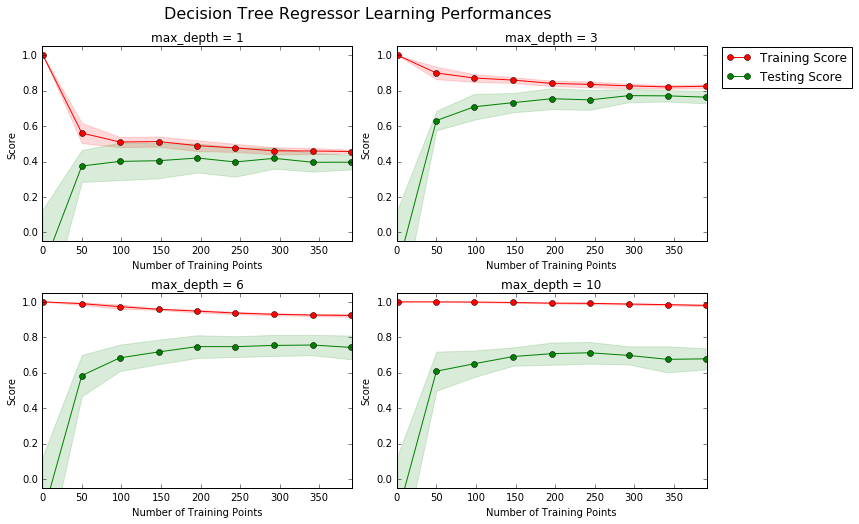

In [63]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

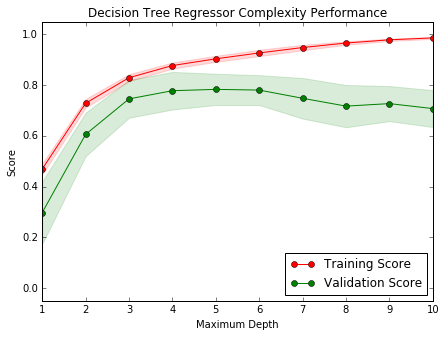

In [64]:
vs.ModelComplexity(X_train, y_train) # 3,4 the best since we also want to keep complexity the least

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

In [69]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object which param will do the best performance here which depth
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [70]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


In [ ]:
reg.predict(X_test, y_test) #????

**Answer: **

In [74]:
#Save a model
import cPickle
with open('model.pkl','wb') as fid:
    cPickle.dump(reg,fid)

In [75]:
#Load model
import cPickle
with open('model.pkl','rb') as fid:
    model_load = cPickle.load(fid)

In [76]:
model_load.get_params()

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}